# Vectorization

Vectorization is a crucial and basic step in stylometric research: it refers to the process of turning text into numbers. More precisely, it refers to the creation of the two-dimensional `X` matrix, which we have been carelessly importing so far: in this matrix, the rows represent documents and the columns represent stylometric features, such as word frequencies. Vectorization is therefore closely related to feature extraction, or determining which stylistic properties should be extracted from documents to arrive at a reliable corpus representation, which is useful for stylometric research. While feature extraction has been a popular research topic in, for instance, authorship studies, there exist few reliable practical introductions to the topic. This is a shame: vectorization is a foundational preprocessing step in stylometry and it has a huge impact on all subsequent analytical steps. It is a pity that most papers are very explicit about the preprocessing steps taken, so that many practical questions remain unanswered:
- Was punctuation removed?
- Were texts lowercased?
- What about character n-grams _across_ word boundaries?
- Were pronouns deleted before or after calculating relative frequencies?
- Was culling performed before or after segmenting texts into samples?
- etc.

This chapter is therefore entirely devoted to this important topic - partially to help raise awareness. The course repository comes with a module called `vectorization.py`, which contains a Vectorizer object which has been developed in the context of the work on `pystyl`. If you import this class, you can check out the documentation:

In [1]:
from vectorization import Vectorizer
help(Vectorizer)

Help on class Vectorizer in module vectorization:

class Vectorizer(builtins.object)
 |  Vectorize texts into a sparse, two-dimensional
 |  matrix.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, mfi=100, ngram_type='word', ngram_size=1, vocabulary=None, vector_space='tf', lowercase=True, min_df=0.0, max_df=1.0, ignore=[])
 |      Initialize the vectorizer by setting up a
 |      vectorization pipeline via sklearn as 
 |      `self.transformer`
 |      
 |      Parameters
 |      ----------
 |      mfi: int, default=100
 |          The nb of most frequent items (words or
 |          ngrams) to extract.
 |      ngram_type: str, default='word'
 |          Set the type of features to be used
 |          for the ngram extraction:
 |          - 'word': individual tokens
 |          - 'char': character ngrams
 |          - 'char_wb': character ngrams (but not
 |              across word boundaries)
 |      ngram_size: int, default=1
 |          The length of the ngrams to be extracted

As you can see, this vectorizer offers easy access to a variety of vectorization strategies. All this code is based on `sklearn` library, but seamlessly wraps around the different modules which are needed. Importantly, the `Vectorizer` offers access to a number of vectorization pipelines that are common in stylometry, but much less in other fields of Machine Learning. Let us load a larger corpus this time and test the vectorizer:

In [2]:
import glob
import os

authors, titles, texts = [], [], []
for filename in glob.glob('data/victorian_large/*.txt'):
    with open(filename, 'r') as f:
        text = f.read()
    author, title = os.path.basename(filename).replace('.txt', '').split('_')
    authors.append(author)
    titles.append(title)
    texts.append(text)

As you can see we loop over the txt-files under the `data/victorian_large` directory and end up with three lists (authors, titles, and the actual texts) which can easily zipped together:

In [3]:
for t, a in zip(titles, authors):
    print(t, 'by', a)

Hard by Dickens
David by Dickens
Wuthering by EBronte
Clarissa by Richardson
Tom by Fielding
Joseph by Fielding
Middlemarch by Eliot
Barchester by Trollope
Jane by CBronte
Vanity by Thackeray
Professor by CBronte
Villette by CBronte
Sentimental by Sterne
Barry by Thackeray
Pamela by Richardson
Tristram by Sterne
Emma by Austen
Adam by Eliot
Tenant by ABronte
Bleak by Dickens
Phineas by Trollope
Prime by Trollope
Mill by Eliot
Pride by Austen
Agnes by ABronte
Pendennis by Thackeray
Sense by Austen


Let us start with some basic preprocessing. The function `preprocess()` below lowercases each text and only retains alphabetic characters (and whitespace). Additionally, to speed things up a bit, we truncate each document after the 200K first characters:

In [4]:
def preprocess(text, max_len=200000):
    return ''.join([c for c in text.lower()
                        if c.isalpha() or c.isspace()])[:max_len]

Let us apply this new function:

In [5]:
for i in range(len(texts)):
    texts[i] = preprocess(texts[i])

We can now instantiate our vectorizer with some traditional settings; we will extract the 100 most frequent words and scale them using the per-column standard deviation. We limit this vectorizer to word unigrams (`ngram_size=1`) and we specify the 'culling' rule (cf. `min_df`) that words should be present in at least 70% of all texts:

In [8]:
vectorizer = Vectorizer(mfi=100,
                        vector_space='tf_std',
                        ngram_type='words',
                        ngram_size=1,
                        min_df=0.7)

We can now use this object to vectorize our lists of documents:

In [10]:
X = vectorizer.vectorize(texts)
print(X.shape)

(27, 100)


/usr/lib64/python3.4/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function std_ is deprecated; Attribute ``std_`` will be removed in 0.19. Use ``scale_`` instead
  warnings.warn(msg, category=DeprecationWarning)


<27x100 sparse matrix of type '<class 'numpy.float64'>'
	with 2696 stored elements in Compressed Sparse Row format>

As requested, we indeed seem to have obtained a two-dimensional matrix, with for each text 100 feature columns. To find out to which words these columns correspond, we can access the vectorizer's `feature_names` attribute:

In [11]:
print(vectorizer.feature_names)

['about', 'all', 'am', 'an', 'and', 'any', 'are', 'as', 'at', 'be', 'been', 'before', 'but', 'by', 'can', 'could', 'did', 'do', 'for', 'from', 'good', 'great', 'had', 'has', 'have', 'he', 'her', 'him', 'his', 'how', 'if', 'in', 'into', 'is', 'it', 'its', 'know', 'like', 'little', 'made', 'man', 'may', 'me', 'might', 'miss', 'more', 'mr', 'mrs', 'much', 'must', 'my', 'never', 'no', 'not', 'now', 'of', 'on', 'one', 'only', 'or', 'other', 'out', 'own', 'said', 'say', 'see', 'she', 'should', 'so', 'some', 'such', 'than', 'that', 'the', 'their', 'them', 'then', 'there', 'they', 'think', 'this', 'time', 'to', 'too', 'up', 'upon', 'very', 'was', 'we', 'well', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'would', 'you', 'your']


Having such a module is great, but it also hides a lot of the interfacing which is needed with sklearn. In the next paragraphs, we will have a lot at the preprocessing functionality which sklearn offers to deal with text.

## Integer frequencies

Calculating absolute frequencies of, for instance, words in texts is something that is rarely done in stylometry. Because we often work with texts of unequal length, it is typically safer to back off to relative frequencies. Nevertheless, it is good to know that sklearn's supports the extraction of absolute counts with its `CountVectorizer`:

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(max_features=100)
X = vec.fit_transform(texts)
print(X.shape)

(27, 100)


Here, we immediately use the important `max_features` parameter, which controls how many of the most frequent words will be returned (cf. the 2nd dimension of the vectorized matrix). Notice that all the vectorization methods discussed here. are implemented as unsupervised methods in sklearn, so that they all have `fit()` and `transform()` methods. One warning is important here: if we check the data type of the matrix being returned, we see that this is not a simple `np.array`:

In [12]:
type(X)

scipy.sparse.csr.csr_matrix

We see that sklearn by default returns a so-called sparse matrix, which only explicitly stores non-zero values. While this very efficient for larger datasets, there are many methods which cannot deal with such sparse matrices - such as sklearn's `PCA`object, to give but one example. If memory is not that much of an issue, it is always safer to convert the sparse matrix back to a 'dense' array:

In [18]:
X = X.toarray()
type(X)

numpy.ndarray

Finally, to access the names of the features which correspond to our columns in X, we can access the following function:

In [19]:
print(vec.get_feature_names())

['about', 'all', 'am', 'an', 'and', 'any', 'are', 'as', 'at', 'be', 'been', 'before', 'but', 'by', 'can', 'could', 'did', 'do', 'for', 'from', 'good', 'great', 'had', 'has', 'have', 'he', 'her', 'him', 'his', 'how', 'if', 'in', 'into', 'is', 'it', 'its', 'know', 'like', 'little', 'made', 'man', 'may', 'me', 'might', 'miss', 'more', 'mr', 'mrs', 'much', 'must', 'my', 'never', 'no', 'not', 'now', 'of', 'on', 'one', 'only', 'or', 'other', 'out', 'own', 'said', 'say', 'see', 'she', 'should', 'so', 'some', 'such', 'than', 'that', 'the', 'their', 'them', 'then', 'there', 'they', 'think', 'this', 'time', 'to', 'too', 'up', 'upon', 'very', 'was', 'we', 'well', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'would', 'you', 'your']


Of course, with `max_features` set to 100, this list is dominated by function words, which are typically the most frequent items in a corpus of texts. Note that extracting binary features - which simply records the absence or presence of items in texts - is also supported, although this is of course even less common in current stylometry:

In [20]:
vec = CountVectorizer(max_features=50, binary=True)
X = vec.fit_transform(texts).toarray()
print(X)

[[1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 ..., 
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]]


When using only 50 top-frequent features, it is logical that these are present in most of our texts.

## Real-valued Frequencies

Working with relative frequencies is much more common in stylometry. Although this is somewhat counter-intuitive, `sklearn` does not have a dedicated function for this vectorization strategy. Rather, one must work with the TfidfVectorizer, which can be imported as follows:

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

`Tfidf` stands for term-frequency/inverse-document-frequency. This particular vectorization method is one of the golden oldies in Information Retrieval: it gives more importance to rare words in texts, by dividing the relative frequency of a 'term' (i.e. 'word') in a document by the inverse of the document. Thus, the rarer a word, the more its importance will be boosted in this model. Note how this model in fact captures the inverse intuition of Burrows's Delta, which gives more weight to highly common words. Tfidf is not very common in stylometry or authorship attribution in particular, although one could easily argue that it is not necessarily useless: if a rare word occurs in two anonymous texts, this does seem to increase the likelihood that both documents were authored by the same individual. In many ways, the TfidfVectorizer can be parametrized in the same way as the CountVectorizer, the main exception being that it will eventually yield a matrix of real number, instead of integers:

In [22]:
vec = TfidfVectorizer(max_features=10)
X = vec.fit_transform(texts).toarray()
print(vec.get_feature_names())
print(X)

['and', 'he', 'her', 'in', 'it', 'of', 'that', 'the', 'to', 'was']
[[ 0.45429342  0.1733393   0.15383863  0.23075794  0.17875615  0.36906826
   0.1625056   0.58465902  0.34884534  0.16900582]
 [ 0.48980216  0.13955257  0.11697789  0.22540476  0.20111988  0.32117614
   0.20385621  0.55786824  0.35059163  0.23840231]
 [ 0.54154418  0.20681018  0.15386393  0.16594562  0.1407162   0.27645759
   0.12970054  0.57352513  0.39407644  0.12437038]
 [ 0.40169724  0.1943819   0.14188738  0.21302126  0.16242871  0.34387718
   0.24079011  0.42984648  0.57439662  0.13427947]
 [ 0.3124657   0.13829379  0.13209667  0.23027221  0.11905008  0.44945483
   0.13894612  0.63536866  0.39335452  0.1373153 ]
 [ 0.36303153  0.18876322  0.08268685  0.22038847  0.11925355  0.39762164
   0.14231363  0.65655338  0.37027898  0.12814815]
 [ 0.34645367  0.1676139   0.17922687  0.22490456  0.14864604  0.44516393
   0.2094206   0.54851938  0.40993791  0.19006564]
 [ 0.34791326  0.20964387  0.10183555  0.18187054  0.10093

To create a vector space that simple has relative frequencies (which have not been normalized using IDF's), we can simple add the following parameter:

In [23]:
vec = TfidfVectorizer(max_features=10,
                      use_idf=False)
X = vec.fit_transform(texts).toarray()
print(vec.get_feature_names())

['and', 'he', 'her', 'in', 'it', 'of', 'that', 'the', 'to', 'was']


Of course, the list of features extracted is not altered by changing this argument, but they values will have changed.

## Feature types

So far, we have only considered word frequencies as stylometric style markers - where we naively define a word as a space-free string of alphabetic characters. Implicitly, we have been setting the `analyzer` argument to `'word'`:

In [24]:
vec = TfidfVectorizer(max_features=10,
                      analyzer='word')
X = vec.fit_transform(texts)
print(vec.get_feature_names())

['and', 'he', 'her', 'in', 'it', 'of', 'that', 'the', 'to', 'was']


It becomes clear, therefore, that sklearn is performing some sort of tokenization internally. Inconveniently, it also removes certain words: can you find out which?

To override this default behaviour, we need a little hack. One common solution is to create our own `analyzer` (i.e. tokenizer) function and pass that to our vectorizer:

In [25]:
def identity(x):
    return x.split()

vec = TfidfVectorizer(max_features=10,
                      analyzer=identity,
                      use_idf=False)
X = vec.fit_transform(texts)
print(vec.get_feature_names())

['a', 'and', 'he', 'i', 'in', 'of', 'that', 'the', 'to', 'was']


Does this solve our issue?

Additionally, sklearn supports the extraction of character n-grams, which are also a common feature type in stylometry. Interestingly, it allows us to specify an `ngram_range`: can you figure out what it achieves? (Executing the block below might take a while...)

In [26]:
vec = TfidfVectorizer(max_features=10,
                      analyzer='char',
                      ngram_range=(2, 2))
X = vec.fit_transform(texts)
print(vec.get_feature_names())

vec = TfidfVectorizer(max_features=30,
                      analyzer='char',
                      ngram_range=(2, 3))
X = vec.fit_transform(texts)
print(vec.get_feature_names())

[' a', ' t', 'd ', 'e ', 'er', 'he', 'in', 's ', 't ', 'th']
[' a', ' h', ' i', ' m', ' o', ' s', ' t', ' th', ' w', 'an', 'd ', 'e ', 'en', 'er', 'ha', 'he', 'he ', 'in', 'n ', 'nd', 'o ', 'on', 'ou', 'r ', 're', 's ', 't ', 'th', 'the', 'y ']


Here, we have to watch out of course, because specifying such ranges will interfere with the `max_features` parameter. Because bigrams are much more frequent than tetragrams, for instance, the tetragrams might never make it to to frequency table, if the `max_features` paramater isn't high enough! Naturally we could gain more control over this extraction process, by running two independent vectorizers, and stacking their respective outcomes:

In [27]:
vec = TfidfVectorizer(max_features=50,
                      analyzer='char',
                      ngram_range=(2, 2))
X1 = vec.fit_transform(texts).toarray()

vec = TfidfVectorizer(max_features=100,
                      analyzer='char',
                      ngram_range=(3, 3))
X2 = vec.fit_transform(texts).toarray()

import numpy as np
print(X1.shape)
print(X2.shape)
X = np.hstack((X1, X2))
print(X.shape)

(27, 50)
(27, 100)
(27, 150)


Here, we finally obtain a matrix with all features.

## Controlling the vocabulary

In this final section, it is worth discussing another set of parameters in the signatures of the sklearn vectorizers, that are especially useful for stylometric research. Culling is a good issue to start with. Although 'culling' is used in a number of different meanings, it typically means that we remove words which aren't well distributed enough over the texts in the corpus. If a specific word - e.g. a character's name - is extremely frequent in only one text, it might end in our list of most frequent features, even though it doesn't scale well to other texts. Using 'culling' we specify the minimum proportion of documents in which a feature should occur, before it is allowed inside the vectorizer's vocabulary. In the sklearn vectorizers, this culling property can be set using the `min_df` argument. Here we see of the 1000 columns we requested, only 615 remain because of the culling:

In [28]:
vec = TfidfVectorizer(max_features=1000, min_df=.95)
X = vec.fit_transform(texts)
print(X.shape[1])

615


Likewise, it is also possible to specify a `max_df`, or the proportion of documents in which an item should occur. This setting might be useful if you wish to remove the focus in your experiments on function words only, and also take into consideration some items from lower frequency strata.

In [29]:
vec = TfidfVectorizer(max_features=100, max_df=.40)
X = vec.fit_transform(texts)
print(vec.get_feature_names())


['ada', 'adam', 'adams', 'allworthy', 'amelia', 'archdeacon', 'arthur', 'barchester', 'barry', 'bennet', 'bessie', 'bingley', 'bishop', 'bounderby', 'brady', 'brooke', 'casaubon', 'catherine', 'celia', 'chancellor', 'collins', 'colonel', 'crawley', 'crimsworth', 'darcy', 'dashwood', 'dobbin', 'dorothea', 'dr', 'duke', 'edward', 'elinor', 'eliza', 'elizabeth', 'elton', 'emma', 'erle', 'finn', 'fitzgibbon', 'fleur', 'glegg', 'gradgrind', 'graham', 'grantly', 'harding', 'harlowe', 'harriet', 'hath', 'heathcliff', 'helen', 'james', 'jarndyce', 'jellyby', 'jervis', 'joseph', 'kennedy', 'knightley', 'la', 'laura', 'le', 'linton', 'lopez', 'louisa', 'lovelace', 'maggie', 'major', 'marianne', 'monsieur', 'murdstone', 'osborne', 'pamela', 'paris', 'parliament', 'partridge', 'peggotty', 'pendennis', 'phineas', 'pitt', 'proudie', 'pullet', 'pupils', 'quin', 'quoth', 'rebecca', 'reed', 'richard', 'roby', 'schoolroom', 'sedley', 'seth', 'slope', 'temple', 'toby', 'trim', 'tulliver', 'weston', 'whar

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # apply pca, only need 2 dimensions
X = X.toarray()
pca.fit(X)
X_bar = pca.transform(X) 


numpy.ndarray

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib64/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


(27, 2)


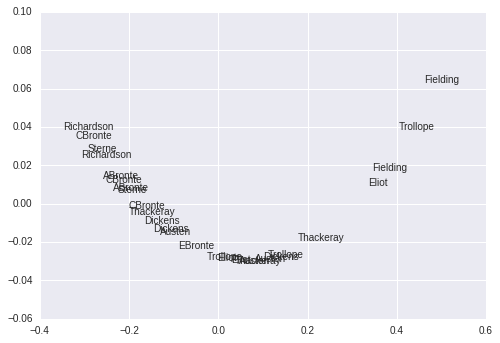

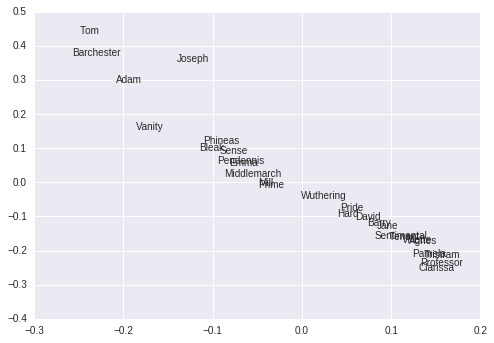

In [43]:
fig, ax1 = sns.plt.subplots()  
x1, x2 = X_bar[:,0], X_bar[:,1] # select coordinates via numpy indexing! "x1 = column 1 from X: X_bar(all, column 0)"
ax1.scatter(x1, x2, 100, edgecolors='none', facecolors='none')
for x, y, author in zip(x1, x2, authors):
    ax1.text(x, y, author, ha='center', va="center") 
    
from sklearn.manifold import MDS
mds = MDS(n_components=2)
X_bar = mds.fit_transform(X)
print(X_bar.shape)
fig, ax1 = sns.plt.subplots()  
x1, x2 = X_bar[:,0], X_bar[:,1] # select coordinates via numpy indexing!
ax1.scatter(x1, x2, 100, edgecolors='none', facecolors='none')
for x, y, title in zip(x1, x2, titles):
    ax1.text(x, y, title, ha='center', va="center")

As you can see, the `max_df` takes us away from the high-frequence function words, with a lot of proper nouns coming through. By the way: make sure that you specify `min_df` and `max_df` as floats: it you specify them as integers, sklearn will interpret these number as the minimum or maximum number of individual documents in which a term should occur.

Finally, it is good to know that we can also manually specify vocabularies, through the `vocabulary` argument. This way, we can exercise a much tighther control over which words go into a procedure - and manually remove words from a previous analysis, if necessary.

In [30]:
vec = TfidfVectorizer(vocabulary=('my', 'i', 'we'))
X = vec.fit_transform(texts)
print(vec.get_feature_names())

['my', 'i', 'we']


-----------------------